In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSMTIA.utils import mapping, parameter_range
from scipy import stats
import math

In [4]:
df = pd.read_csv("analysis/not_uploaded/RANKIQA_test_scores.csv", sep=";")
df

,img,parameter,change,score
0,abbey-glass-religion-architecture-106158.jpeg,original,0.0,3.200890
1,abraham-lincoln-lincoln-memorial-washington-dc...,original,0.0,3.328421
2,abstract-background-backgrounds-botany-87770.jpeg,original,0.0,3.997662
3,adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,2.746082
4,adult-cute-face-female-41522.jpeg,original,0.0,3.346457
...,...,...,...,...
2744995,wood-painting-window-cactus-6689.jpg,ratio,5.0,2.434229
2744996,wood-sky-forest-autumn.jpg,ratio,5.0,3.384077
2744997,wood-stool-wooden-wine.jpg,ratio,5.0,3.397511
2744998,wood-tree-brown-bark.jpg,ratio,5.0,1.880973


In [5]:
pd.DataFrame(df[df["parameter"] != "original"][["img", "score"]].groupby("img").max().to_records()).sort_values("img")

,img,score
0,SW_Pamela%2BWebb.jpg,4.937974
1,abbey-glass-religion-architecture-106158.jpeg,4.618534
2,abraham-lincoln-lincoln-memorial-washington-dc...,5.045111
3,abstract-background-backgrounds-botany-87770.jpeg,4.746921
4,adler-bird-bird-of-prey-raptor-53587.jpeg,4.217912
...,...,...
14995,wood-painting-window-cactus-6689.jpg,5.173976
14996,wood-sky-forest-autumn.jpg,4.832448
14997,wood-stool-wooden-wine.jpg,5.781147
14998,wood-tree-brown-bark.jpg,6.352758


In [6]:
df[df["parameter"] == "original"][["img", "score"]].sort_values("img").reset_index()

,index,img,score
0,2728553,SW_Pamela%2BWebb.jpg,2.929579
1,0,abbey-glass-religion-architecture-106158.jpeg,3.200890
2,1,abraham-lincoln-lincoln-memorial-washington-dc...,3.328421
3,2,abstract-background-backgrounds-botany-87770.jpeg,3.997662
4,3,adler-bird-bird-of-prey-raptor-53587.jpeg,2.746082
...,...,...,...
14995,2739535,wood-painting-window-cactus-6689.jpg,2.733231
14996,2739536,wood-sky-forest-autumn.jpg,3.169120
14997,2739537,wood-stool-wooden-wine.jpg,4.764267
14998,2739538,wood-tree-brown-bark.jpg,3.649884


In [7]:
# & (df["parameter"] != "pixelate") & (df["parameter"] != "impulse_noise")
scores = pd.DataFrame(df[(df["parameter"] != "original")][["img", "score"]].groupby("img").max().to_records()).sort_values("img").rename(columns={"score":"best_score"})
scores["orig_score"] = df[df["parameter"] == "original"][["img", "score"]].sort_values("img").reset_index()["score"]
scores["diff"] = scores["orig_score"] - scores["best_score"]
scores

,img,best_score,orig_score,diff
0,SW_Pamela%2BWebb.jpg,4.937974,2.929579,-2.008395
1,abbey-glass-religion-architecture-106158.jpeg,4.618534,3.200890,-1.417644
2,abraham-lincoln-lincoln-memorial-washington-dc...,5.045111,3.328421,-1.716689
3,abstract-background-backgrounds-botany-87770.jpeg,4.746921,3.997662,-0.749259
4,adler-bird-bird-of-prey-raptor-53587.jpeg,4.217912,2.746082,-1.471831
...,...,...,...,...
14995,wood-painting-window-cactus-6689.jpg,5.173976,2.733231,-2.440745
14996,wood-sky-forest-autumn.jpg,4.832448,3.169120,-1.663328
14997,wood-stool-wooden-wine.jpg,5.781147,4.764267,-1.016880
14998,wood-tree-brown-bark.jpg,6.352758,3.649884,-2.702874


In [8]:
scores.nlargest(10, "diff")

,img,best_score,orig_score,diff
22,animal-bird-hornbill-helmet-hornbill-67225.jpeg,4.925519,4.902370,-0.023149
2353,pexels-photo-1322331.jpeg,4.679079,4.542634,-0.136445
9542,pexels-photo-2883988.jpeg,4.781163,4.642329,-0.138834
3933,pexels-photo-1652298.jpeg,4.240922,4.098281,-0.142641
12284,pexels-photo-395088.jpeg,4.264079,4.087526,-0.176553
13369,pexels-photo-735236.jpeg,5.373694,5.195057,-0.178638
14042,pexels-photo-879486.jpeg,5.317812,5.126223,-0.191589
4776,pexels-photo-1809682.jpeg,5.503941,5.307616,-0.196324
5247,pexels-photo-190977.jpeg,4.975752,4.778706,-0.197046
8967,pexels-photo-2754479.jpeg,5.920467,5.723333,-0.197134


In [9]:
scores.nsmallest(10, "diff")

,img,best_score,orig_score,diff
449,nature-lake-water-waves-1928127.jpeg,9.695074,3.219968,-6.475106
1339,pexels-photo-1121887.jpeg,9.949200,3.585835,-6.363364
9696,pexels-photo-2909088.jpeg,8.623619,2.687242,-5.936378
11135,pexels-photo-3312274.jpeg,9.040106,3.392139,-5.647967
14351,pexels-photo-925711.jpeg,7.274830,1.735425,-5.539405
4268,pexels-photo-1699022.jpeg,8.799383,3.298308,-5.501075
13119,pexels-photo-691884.jpeg,8.362560,3.154347,-5.208213
14224,pexels-photo-911572.jpeg,7.441386,2.351642,-5.089744
5179,pexels-photo-189266.jpeg,7.824227,2.737375,-5.086853
12999,pexels-photo-669577.jpeg,11.705754,6.668240,-5.037515


In [10]:
nsmall = []
for i, row in scores.nsmallest(10, "diff").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["score"] == row.best_score)])
pd.concat(nsmall)

,img,parameter,change,score
78988,nature-lake-water-waves-1928127.jpeg,temperature,3000.00,9.695074
244068,pexels-photo-1121887.jpeg,tint,0.75,9.949200
1775735,pexels-photo-2909088.jpeg,temperature,25000.00,8.623619
2039284,pexels-photo-3312274.jpeg,tint,0.75,9.040106
2626060,pexels-photo-925711.jpeg,exposure,2.40,7.274830
782077,pexels-photo-1699022.jpeg,tint,0.75,8.799383
2401628,pexels-photo-691884.jpeg,tint,0.75,8.362560
2604363,pexels-photo-911572.jpeg,temperature,3000.00,7.441386
947058,pexels-photo-189266.jpeg,tint,1.25,7.824227
2379668,pexels-photo-669577.jpeg,tint,0.75,11.705754


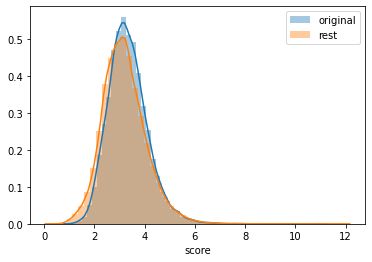

In [11]:
sns.distplot(df[df["parameter"] == "original"]["score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["score"], label="rest")
plt.legend()

In [12]:
def histogram_distortion(distortion:str):
    sns.distplot(df[df["parameter"] == "original"]["score"], label="original")
    for change in (val for val in mapping["all_changes"] if distortion in val):
        parameter, change = change.split(";")
        sns.distplot(df[(df["parameter"] == parameter) & (df["change"] == float(change))]["score"], label=f"{parameter}: {change}")
    plt.legend()

In [13]:
def violin_distortion(distortion:str): # FIXME defaults for shadows, hightlights...
    plot_frame = df[(df["parameter"] == distortion) | (df["parameter"] == "original")]
    if distortion in parameter_range:
        plot_frame.loc[plot_frame["parameter"] == "original", "change"] = parameter_range[distortion]["default"]
    sns.violinplot(data=plot_frame, x="change", y="score", color="steelblue")

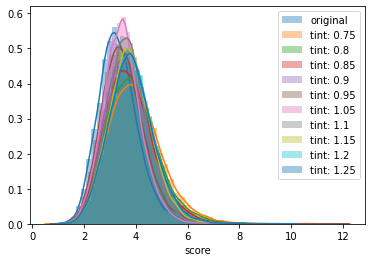

In [14]:
histogram_distortion("tint")

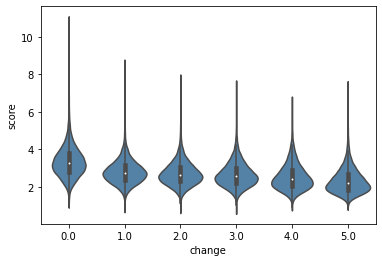

In [15]:
violin_distortion("jpeg_compression")

In [53]:
def calculate_spearman(distortion:str, polarity:str, img_names=df["img"].unique()):
    corr_l = []
    p_l = []
    for i, f in enumerate(img_names):
        print(f"{i}/{len(img_names)}")
        corr_df = df[(df["img"] == f) & ((df["parameter"] == distortion) | (df["parameter"] == "original"))]
        del corr_df["dist"]
        if distortion in parameter_range:
            corr_df.loc[corr_df["parameter"] == "original", "change"] = parameter_range[distortion]["default"]

        if distortion in parameter_range:
            if polarity == "pos":
                corr_df = corr_df[corr_df["change"] >= parameter_range[distortion]["default"]]
            else:
                corr_df = corr_df[corr_df["change"] <= parameter_range[distortion]["default"]]
            rel_change = [-abs((val) - (parameter_range[distortion]["default"])) for val in corr_df["change"]]
        else:
            if polarity == "pos":
                corr_df = corr_df[corr_df["change"] >= 0]
            else:
                corr_df = corr_df[corr_df["change"] <= 0]
            rel_change = [-val for val in corr_df["change"]]
        c, p = stats.spearmanr(corr_df["score"], rel_change)
        corr_l.append(c)
        p_l.append(p)
    return sum(corr_l)/len(corr_l), sum(p_l)/len(p_l)

In [52]:
calculate_spearman("jpeg_compression", polarity="pos")

0/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
1/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
2/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
3/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
4/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
5/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
6/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
7/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
8/15000
Index(['img', 'parameter', 'change', 'score'], dtype='object')
9/15000


KeyboardInterrupt: 

In [38]:
del parameter_range["jpeg_compression"]
parameter_range.keys()

dict_keys(['contrast', 'brightness', 'saturation', 'shadows', 'highlights', 'exposure', 'vibrance', 'temperature', 'tint', 'lcontrast'])